# **regression**

In [137]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# 
from sklearn.preprocessing import MinMaxScaler
# 
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input
# 
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.losses import mse
# 
from tensorflow.keras.callbacks import EarlyStopping

from tensorflow.keras.callbacks import ModelCheckpoint
#
from tensorflow.keras.regularizers import l2

In [138]:
(train_data, train_labels), (test_data, test_labels) = tf.keras.datasets.boston_housing.load_data()

In [139]:
train_data.shape

(404, 13)

In [140]:
test_data.shape

(102, 13)

In [141]:
train_labels.shape

(404,)

In [142]:
train_data.dtype

dtype('float64')

In [143]:
test_data.dtype

dtype('float64')

In [144]:
train_labels = np.reshape(train_labels, newshape=(-1,1))
test_labels  = np.reshape(test_labels, newshape=(-1,1))

In [145]:
train_labels.shape

(404, 1)

In [146]:
test_labels.shape

(102, 1)

In [147]:
train_data.min(axis=0) , train_data.max(axis=0)

(array([6.3200e-03, 0.0000e+00, 4.6000e-01, 0.0000e+00, 3.8500e-01,
        3.5610e+00, 2.9000e+00, 1.1296e+00, 1.0000e+00, 1.8800e+02,
        1.2600e+01, 3.2000e-01, 1.7300e+00]),
 array([ 88.9762, 100.    ,  27.74  ,   1.    ,   0.871 ,   8.725 ,
        100.    ,  10.7103,  24.    , 711.    ,  22.    , 396.9   ,
         37.97  ]))

In [148]:
min_max_scaler = MinMaxScaler()

In [149]:
min_max_scaler.fit(train_data)

MinMaxScaler()

In [150]:
train_data = min_max_scaler.transform(train_data)
test_data  = min_max_scaler.transform(test_data)

In [151]:
train_data.min(axis=0) , train_data.max(axis=0)

(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]))

In [152]:
test_data.min(axis=0) , test_data.max(axis=0)

(array([ 7.63179629e-05,  0.00000000e+00,  2.78592375e-02,  0.00000000e+00,
         1.44032922e-02,  2.55422153e-01,  3.19258496e-02,  3.50600687e-02,
         0.00000000e+00, -1.91204589e-03,  4.25531915e-02,  6.13495386e-02,
         5.24282561e-03]),
 array([0.28144109, 0.9       , 1.        , 1.        , 1.        ,
        1.01065066, 1.        , 1.14781801, 1.        , 1.        ,
        0.91489362, 1.        , 0.83498896]))

In [153]:
train_labels.min(), train_labels.max()

(5.0, 50.0)

In [154]:
train_labels = train_labels / 50.0
test_labels  = test_labels / 50.0



In [155]:
train_labels.min() , train_labels.max()

(0.1, 1.0)

In [156]:
train_data   = train_data.astype(np.float32)
test_data    = test_data.astype(np.float32)
train_labels = train_labels.astype(np.float32)
test_labels  = test_labels.astype(np.float32)

In [157]:
input_layer = Input((13,))

first_layer_output  = Dense(units = 25 , activation= "relu" , kernel_regularizer=l2(0.0001), bias_regularizer=l2(0.01))(input_layer)
second_layer_output = Dense(units = 15 , activation= "relu", kernel_regularizer=l2(0.0001), bias_regularizer=l2(0.01))(first_layer_output)
third_layer_output = Dense(units = 8 , activation= "relu", kernel_regularizer=l2(0.0001), bias_regularizer=l2(0.01))(second_layer_output)

# output = Dense(units=1, activation = "sigmoid", kernel_regularizer=l2(0.0001), bias_regularizer=l2(0.01))(third_layer_output) 

output = Dense(units=1)(third_layer_output) 

regression_model = Model(input_layer, output)
regression_model.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 13)]              0         
_________________________________________________________________
dense_12 (Dense)             (None, 25)                350       
_________________________________________________________________
dense_13 (Dense)             (None, 15)                390       
_________________________________________________________________
dense_14 (Dense)             (None, 8)                 128       
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 9         
Total params: 877
Trainable params: 877
Non-trainable params: 0
_________________________________________________________________


In [158]:
# regression_model.compile(optimizer=Adam() ,loss=mse)
# lrate = initial_lrate * (1 / (1 + decay * iteration))
regression_model.compile(optimizer=SGD(learning_rate = 0.1 , momentum=0.9 , decay =0.0015),loss=mse)

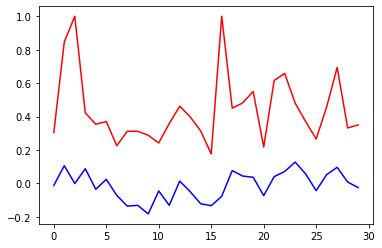

In [159]:
plt.plot(train_labels[:30], "r-")
plt.plot(regression_model(train_data[:30]), "b-")

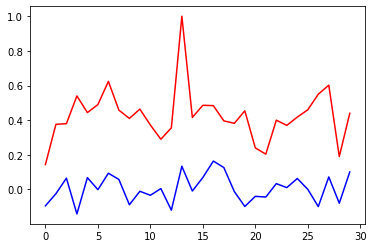

In [160]:
plt.plot(test_labels[:30], "r-")
plt.plot(regression_model(test_data[:30]), "b-")

In [161]:
# early_stop = EarlyStopping(monitor='val_loss' , patience=50, restore_best_weights=True)
# model_checkpoint = ModelCheckPoint("boston_housing_mode.h5" , monitor ='val_loss' , save_best_only =True , mode="min")


In [162]:
regression_model.fit(x=train_data, y=train_labels, batch_size=64, epochs = 800 , validation_data=(test_data, test_labels))
# regression_model.fit(x=train_data, y=train_labels, batch_size=32, epochs = 400 , validation_data=(test_data, test_labels))


Train on 404 samples, validate on 102 samples
Epoch 1/800
404/404 [==============================] - 1s 3ms/sample - loss: 0.1027 - val_loss: 0.0987
Epoch 2/800
404/404 [==============================] - 0s 82us/sample - loss: 0.0732 - val_loss: 0.0431
Epoch 3/800
404/404 [==============================] - 0s 82us/sample - loss: 0.0457 - val_loss: 0.0415
Epoch 4/800
404/404 [==============================] - 0s 79us/sample - loss: 0.0426 - val_loss: 0.0408
Epoch 5/800
404/404 [==============================] - 0s 77us/sample - loss: 0.0414 - val_loss: 0.0395
Epoch 6/800
404/404 [==============================] - 0s 77us/sample - loss: 0.0390 - val_loss: 0.0360
Epoch 7/800
404/404 [==============================] - 0s 78us/sample - loss: 0.0365 - val_loss: 0.0319
Epoch 8/800
404/404 [==============================] - 0s 78us/sample - loss: 0.0316 - val_loss: 0.0283
Epoch 9/800
404/404 [==============================] - 0s 77us/sample - loss: 0.0274 - val_loss: 0.0244
Epoch 10/800
404/40

Epoch 154/800
404/404 [==============================] - 0s 146us/sample - loss: 0.0068 - val_loss: 0.0132
Epoch 155/800
404/404 [==============================] - 0s 138us/sample - loss: 0.0069 - val_loss: 0.0131
Epoch 156/800
404/404 [==============================] - 0s 135us/sample - loss: 0.0070 - val_loss: 0.0128
Epoch 157/800
404/404 [==============================] - 0s 109us/sample - loss: 0.0068 - val_loss: 0.0132
Epoch 158/800
404/404 [==============================] - 0s 69us/sample - loss: 0.0069 - val_loss: 0.0144
Epoch 159/800
404/404 [==============================] - 0s 128us/sample - loss: 0.0073 - val_loss: 0.0137
Epoch 160/800
404/404 [==============================] - 0s 159us/sample - loss: 0.0071 - val_loss: 0.0132
Epoch 161/800
404/404 [==============================] - 0s 153us/sample - loss: 0.0070 - val_loss: 0.0137
Epoch 162/800
404/404 [==============================] - 0s 157us/sample - loss: 0.0068 - val_loss: 0.0129
Epoch 163/800
404/404 [===============

Epoch 231/800
404/404 [==============================] - 0s 139us/sample - loss: 0.0064 - val_loss: 0.0125
Epoch 232/800
404/404 [==============================] - 0s 124us/sample - loss: 0.0064 - val_loss: 0.0125
Epoch 233/800
404/404 [==============================] - 0s 110us/sample - loss: 0.0064 - val_loss: 0.0127
Epoch 234/800
404/404 [==============================] - 0s 111us/sample - loss: 0.0063 - val_loss: 0.0131
Epoch 235/800
404/404 [==============================] - 0s 120us/sample - loss: 0.0064 - val_loss: 0.0130
Epoch 236/800
404/404 [==============================] - 0s 94us/sample - loss: 0.0065 - val_loss: 0.0127
Epoch 237/800
404/404 [==============================] - 0s 69us/sample - loss: 0.0063 - val_loss: 0.0125
Epoch 238/800
404/404 [==============================] - 0s 131us/sample - loss: 0.0064 - val_loss: 0.0124
Epoch 239/800
404/404 [==============================] - 0s 132us/sample - loss: 0.0064 - val_loss: 0.0127
Epoch 240/800
404/404 [================

404/404 [==============================] - 0s 74us/sample - loss: 0.0058 - val_loss: 0.0119
Epoch 384/800
404/404 [==============================] - 0s 77us/sample - loss: 0.0058 - val_loss: 0.0120
Epoch 385/800
404/404 [==============================] - 0s 79us/sample - loss: 0.0058 - val_loss: 0.0119
Epoch 386/800
404/404 [==============================] - 0s 77us/sample - loss: 0.0058 - val_loss: 0.0120
Epoch 387/800
404/404 [==============================] - 0s 68us/sample - loss: 0.0058 - val_loss: 0.0118
Epoch 388/800
404/404 [==============================] - 0s 82us/sample - loss: 0.0058 - val_loss: 0.0118
Epoch 389/800
404/404 [==============================] - 0s 77us/sample - loss: 0.0058 - val_loss: 0.0118
Epoch 390/800
404/404 [==============================] - 0s 109us/sample - loss: 0.0058 - val_loss: 0.0119
Epoch 391/800
404/404 [==============================] - 0s 124us/sample - loss: 0.0058 - val_loss: 0.0120
Epoch 392/800
404/404 [==============================] - 0

Epoch 460/800
404/404 [==============================] - 0s 115us/sample - loss: 0.0056 - val_loss: 0.0117
Epoch 461/800
404/404 [==============================] - 0s 116us/sample - loss: 0.0056 - val_loss: 0.0117
Epoch 462/800
404/404 [==============================] - 0s 118us/sample - loss: 0.0056 - val_loss: 0.0117
Epoch 463/800
404/404 [==============================] - 0s 106us/sample - loss: 0.0056 - val_loss: 0.0116
Epoch 464/800
404/404 [==============================] - 0s 116us/sample - loss: 0.0056 - val_loss: 0.0116
Epoch 465/800
404/404 [==============================] - 0s 101us/sample - loss: 0.0056 - val_loss: 0.0117
Epoch 466/800
404/404 [==============================] - 0s 98us/sample - loss: 0.0056 - val_loss: 0.0116
Epoch 467/800
404/404 [==============================] - 0s 99us/sample - loss: 0.0056 - val_loss: 0.0115
Epoch 468/800
404/404 [==============================] - 0s 120us/sample - loss: 0.0056 - val_loss: 0.0114
Epoch 469/800
404/404 [================

Epoch 613/800
404/404 [==============================] - 0s 72us/sample - loss: 0.0053 - val_loss: 0.0114
Epoch 614/800
404/404 [==============================] - 0s 83us/sample - loss: 0.0053 - val_loss: 0.0114
Epoch 615/800
404/404 [==============================] - 0s 87us/sample - loss: 0.0053 - val_loss: 0.0113
Epoch 616/800
404/404 [==============================] - 0s 94us/sample - loss: 0.0053 - val_loss: 0.0114
Epoch 617/800
404/404 [==============================] - 0s 141us/sample - loss: 0.0053 - val_loss: 0.0114
Epoch 618/800
404/404 [==============================] - 0s 131us/sample - loss: 0.0053 - val_loss: 0.0113
Epoch 619/800
404/404 [==============================] - 0s 133us/sample - loss: 0.0053 - val_loss: 0.0113
Epoch 620/800
404/404 [==============================] - 0s 134us/sample - loss: 0.0053 - val_loss: 0.0116
Epoch 621/800
404/404 [==============================] - 0s 104us/sample - loss: 0.0053 - val_loss: 0.0116
Epoch 622/800
404/404 [==================

Epoch 766/800
404/404 [==============================] - 0s 116us/sample - loss: 0.0051 - val_loss: 0.0113
Epoch 767/800
404/404 [==============================] - 0s 116us/sample - loss: 0.0051 - val_loss: 0.0112
Epoch 768/800
404/404 [==============================] - 0s 122us/sample - loss: 0.0051 - val_loss: 0.0112
Epoch 769/800
404/404 [==============================] - 0s 123us/sample - loss: 0.0051 - val_loss: 0.0112
Epoch 770/800
404/404 [==============================] - 0s 121us/sample - loss: 0.0051 - val_loss: 0.0112
Epoch 771/800
404/404 [==============================] - 0s 112us/sample - loss: 0.0051 - val_loss: 0.0112
Epoch 772/800
404/404 [==============================] - 0s 113us/sample - loss: 0.0051 - val_loss: 0.0112
Epoch 773/800
404/404 [==============================] - 0s 114us/sample - loss: 0.0051 - val_loss: 0.0112
Epoch 774/800
404/404 [==============================] - 0s 118us/sample - loss: 0.0051 - val_loss: 0.0113
Epoch 775/800
404/404 [==============

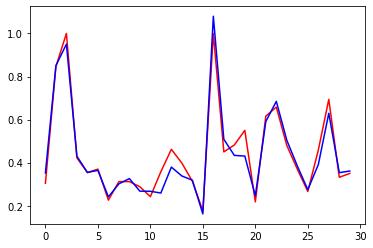

In [163]:
plt.plot(train_labels[:30], "r-")
plt.plot(regression_model(train_data[:30]), "b-")

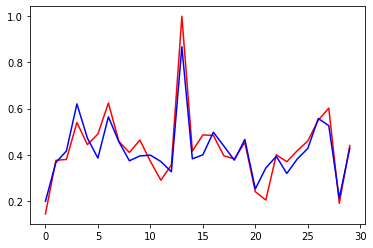

In [164]:
plt.plot(test_labels[:30], "r-")
plt.plot(regression_model(test_data[:30]), "b-")

<AxesSubplot:>

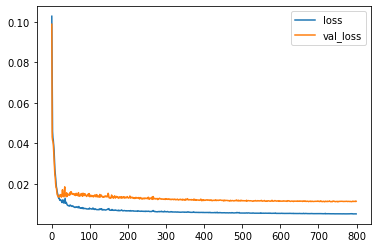

In [165]:
history = pd.DataFrame(regression_model.history.history)
history.plot()

In [166]:
model_predictions = regression_model.predict(x = test_data, batch_size=8)
model_predictions.shape

(102, 1)

In [167]:
model_predictions = model_predictions * 50.

In [168]:
num_error = 0.0
error_threshold = 5.0
for index in range(len(model_predictions)):
  if abs(model_predictions[index] - test_labels[index]* 50.0) > error_threshold:
    num_error += 1

print(num_error)
print("accuracy = {}".format(1. - (num_error / len(model_predictions))))

20.0
accuracy = 0.803921568627451


In [ ]:
regression_model.evaluate(x = test_data, y= test_labels, batch_size = 0)

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\Users\sevda\anaconda3\envs\part_college\lib\site-packages\IPython\core\interactiveshell.py", line 3457, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\sevda\AppData\Local\Temp/ipykernel_17980/2315990825.py", line 1, in <module>
    regression_model.evaluate(x = test_data, y= test_labels, batch_size = 0)
  File "C:\Users\sevda\anaconda3\envs\part_college\lib\site-packages\tensorflow_core\python\keras\engine\training.py", line 930, in evaluate
    use_multiprocessing=use_multiprocessing)
  File "C:\Users\sevda\anaconda3\envs\part_college\lib\site-packages\tensorflow_core\python\keras\engine\training_v2.py", line 490, in evaluate
    use_multiprocessing=use_multiprocessing, **kwargs)
  File "C:\Users\sevda\anaconda3\envs\part_college\lib\site-packages\tensorflow_core\python\keras\engine\training_v2.py", line 410, in _model_iteration
    strategy, x, batch_size, steps, mode)
  File "C:\Users\sevda\anaconda3\e